## Importação das bibliotecas

In [15]:
import numpy as np
import xarray as xr
import warnings
import pandas as pd
import re

warnings.filterwarnings('ignore')
%matplotlib inline

### Leitura dos dados

In [32]:
xds = xr.open_dataset('data/sbmn_rain_rates_20140201_004808.nc')
df = pd.read_csv('data/RG1_T3_rr_byHour.txt', sep="\s+", header=None,names=['year','month','day','hour','null','null2','value'])

### Variáveis presentes no conjunto de dados

In [3]:
xds.data_vars

Data variables:
    start_time  datetime64[ns] ...
    stop_time   datetime64[ns] ...
    lat0        (y0, x0) float32 ...
    lon0        (y0, x0) float32 ...
    rain_rate   (y0, x0) float32 ...

In [4]:
rr = xds.rain_rate                  ### Matriz com valores de preciptacao
runit = xds.rain_rate.units         ### Unidade mm/h
rkm = xds.rain_rate.height_km       ### Unidade de altitude km
start_time = xds.start_time.data    ### Tempo inical
stop_time = xds.stop_time.data      ### Tempo Final
lon = xds.lon0.data                 ### Matriz Longitude
lat = xds.lat0.data                 ### Matriz

In [33]:
df.head()

,year,month,day,hour,null,null2,value
0,2014.0,1.0,3.0,22.0,0.0,0.0,1.270
1,2014.0,1.0,4.0,15.0,0.0,0.0,0.254
2,2014.0,1.0,5.0,19.0,0.0,0.0,5.842
3,2014.0,1.0,5.0,20.0,0.0,0.0,3.048
4,2014.0,1.0,6.0,9.0,0.0,0.0,0.254


In [38]:
agreg = df.groupby(['month']).agg(['sum'])

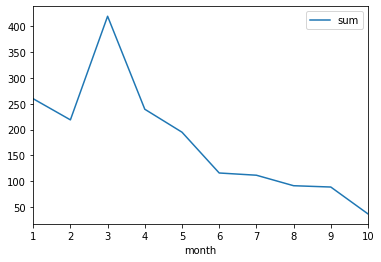

In [39]:
agreg['value'].plot()

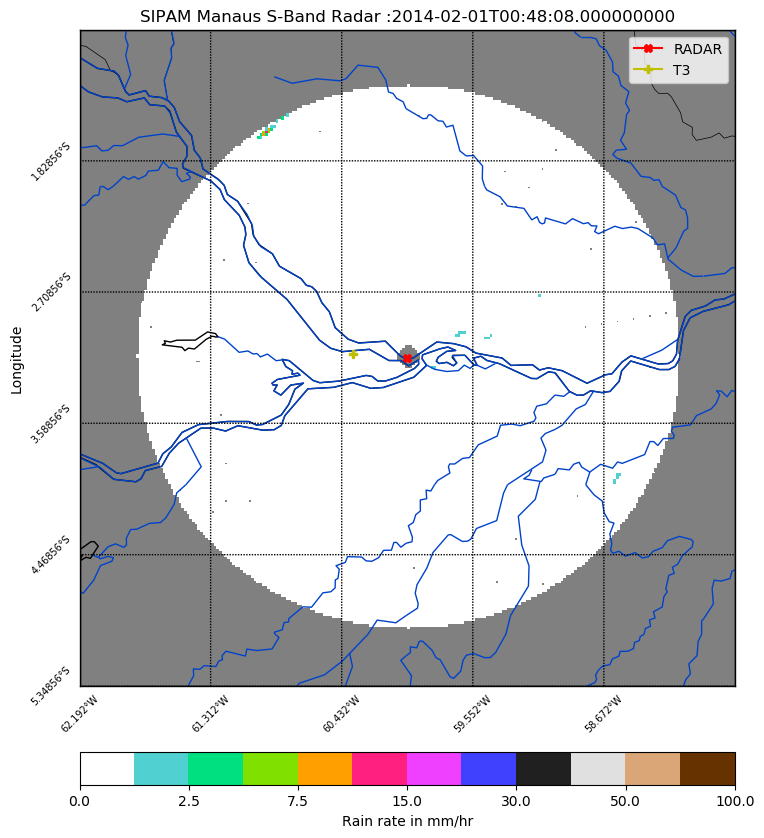

In [5]:
from lib.radar_plot import radar_plot
radar_plot(rr=rr,runit=runit,lat=lat,lon=lon,start_time=start_time,stop_time=stop_time)

In [48]:
import requests

In [49]:
r = requests.get('https://iop.archive.arm.gov/arm-iop/2014/mao/goamazon/T1/schumacher-sband_rr/2014_v2/20140103/?frame=listing&uid=LEALH1&st=5d44910d')

In [52]:
r.content

b'<html><head><title>Index of /arm-iop/2014/mao/goamazon/T1/schumacher-sband_rr/2014_v2/20140103/ - ARM Intensive Operational Period (IOP) Data Browser</title>\n<script type="text/javascript" src="https://iop.archive.arm.gov/scripts/listing.js"></script><script type="text/javascript" src="https://www.archive.arm.gov/armlogin/scripts/jquery.js"></script><script type="text/javascript" src="https://iop.archive.arm.gov/scripts/logging.js"></script></head>\n<body bgcolor="#ffffff" onLoad="update_checkboxes();">\n<form name="item_list">\n<h2><input type="checkbox" name="item" value="/arm-iop/2014/mao/goamazon/T1/schumacher-sband_rr/2014_v2/20140103/" onClick="if (this.checked) itemSelect(\'/arm-iop/2014/mao/goamazon/T1/schumacher-sband_rr/2014_v2/20140103/\', this); else itemDeselect(\'/arm-iop/2014/mao/goamazon/T1/schumacher-sband_rr/2014_v2/20140103/\', this); update_checkboxes();"> /arm-iop/2014/mao/goamazon/T1/schumacher-sband_rr/2014_v2/20140103/</h2>\n<hr>\n<pre>\n<input type="checkbox